In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

Señales originales.

In [7]:
directorio_csv = 'CSV_F1'
# Lista todos los archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio_csv) if archivo.endswith('.csv')]

for archivo in archivos_csv:
    ruta_completa = os.path.join(directorio_csv, archivo)
    # Leer cada archivo CSV, saltando las primeras 3 filas
    df = pd.read_csv(ruta_completa, skiprows=10)

    # Seleccionar la primera columna para el tiempo y la segunda para los valores de la señal
    time = df.iloc[:, 0].to_numpy()
    signal = df.iloc[:, 1].to_numpy()

    # Calcular min y max para el eje Y
    min_value, max_value = signal.min(), signal.max()

    # Agregar un margen al eje Y
    margen = (max_value - min_value) * 0.05  # Un margen del 5%

    # Graficar la señal
    plt.figure(figsize=(15, 5))
    plt.plot(time, signal, label='Señal', linewidth=0.5)
    plt.ylim(min_value - margen, max_value + margen)  # Aplicar los límites con margen al eje Y
    plt.title(f'Señal del archivo: {archivo}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (V)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'CSV_F1'

Promedio movil

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

directorio_csv = 'CSV_F1'
ventana = 1000  # Tamaño de la ventana del promedio móvil

# Lista todos los archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio_csv) if archivo.endswith('.csv')]

for archivo in archivos_csv:
    ruta_completa = os.path.join(directorio_csv, archivo)
    # Leer cada archivo CSV, saltando las primeras 3 filas
    df = pd.read_csv(ruta_completa, skiprows=10)

    # Seleccionar la primera columna para el tiempo y la segunda para los valores de la señal
    time = df.iloc[:, 0].to_numpy()
    signal = df.iloc[:, 1].to_numpy()

    # Crear un vector de unos para la convolución que representa el promedio móvil
    vector_ones = np.ones(ventana) / ventana

    # Aplicar convolución para calcular el promedio móvil
    signal_avg = np.convolve(signal, vector_ones, mode='valid')

    # Ajustar la serie de tiempo para que coincida con la longitud de la señal filtrada
    time_avg = time[ventana-1:]

    # Crear el gráfico
    plt.figure(figsize=(20, 3))  # Puedes ajustar el tamaño del gráfico según tus necesidades
    plt.plot(time_avg, signal_avg, label='Señal promedio móvil', linewidth=0.5)  

    plt.title(f'Señal del archivo: {archivo}')
    plt.xlabel('Tiempo (s)')  # Etiqueta para el eje X
    plt.ylabel('Amplitud (V)')  # Etiqueta para el eje Y
    plt.legend()
    plt.grid(True)

    plt.show()
    plt.close()


FileNotFoundError: [Errno 2] No such file or directory: 'CSV_F1'

Smooth

In [50]:
# Definición de la función de suavizado
def smooth(x, window_len=11, window='hanning'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_len < 3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is one of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

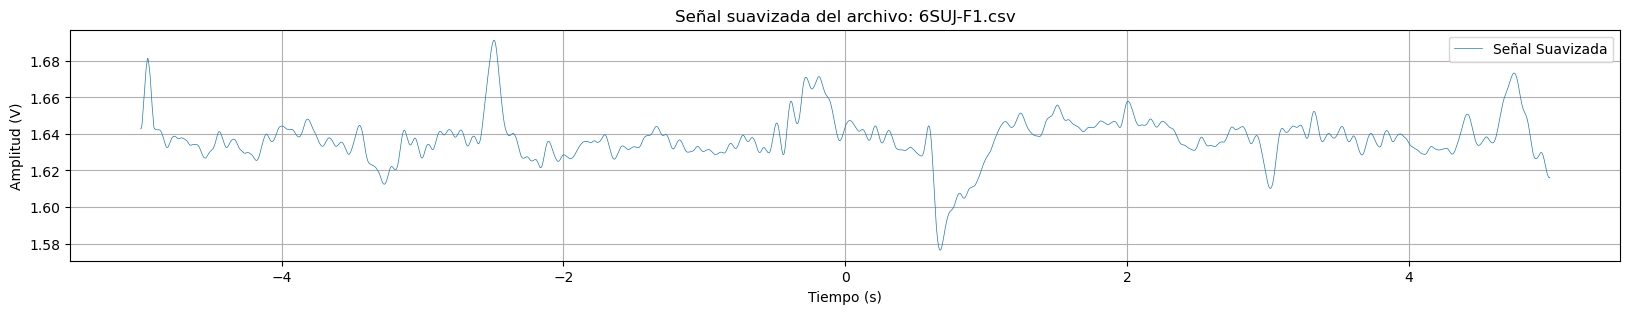

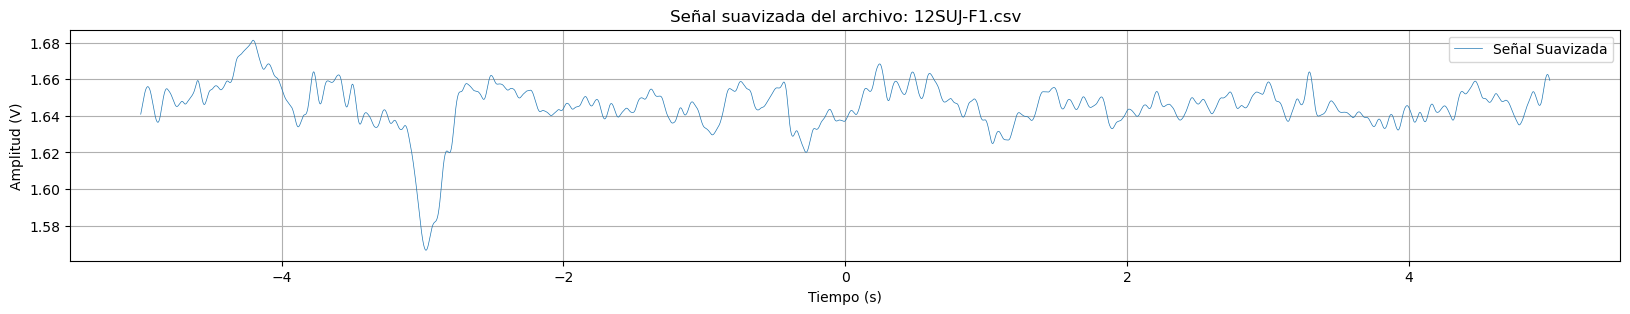

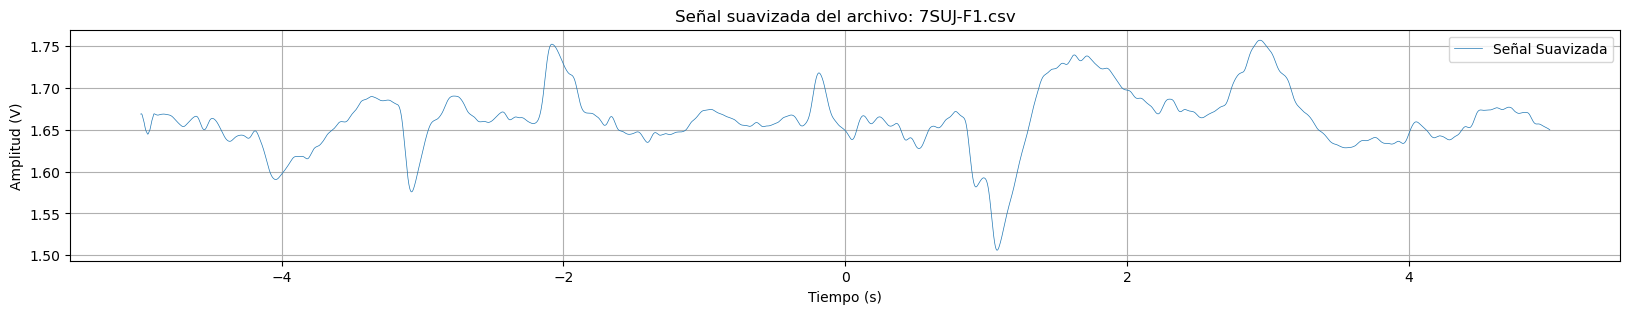

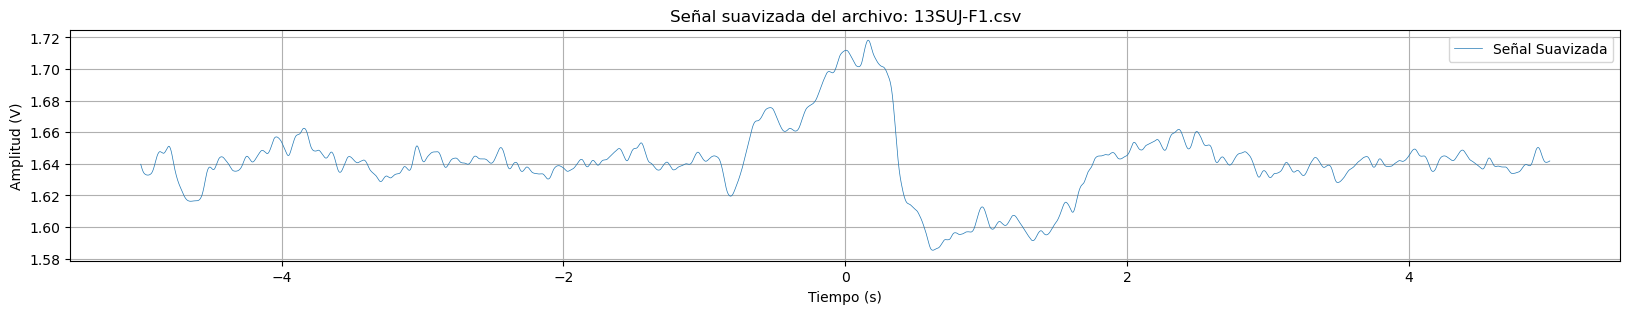

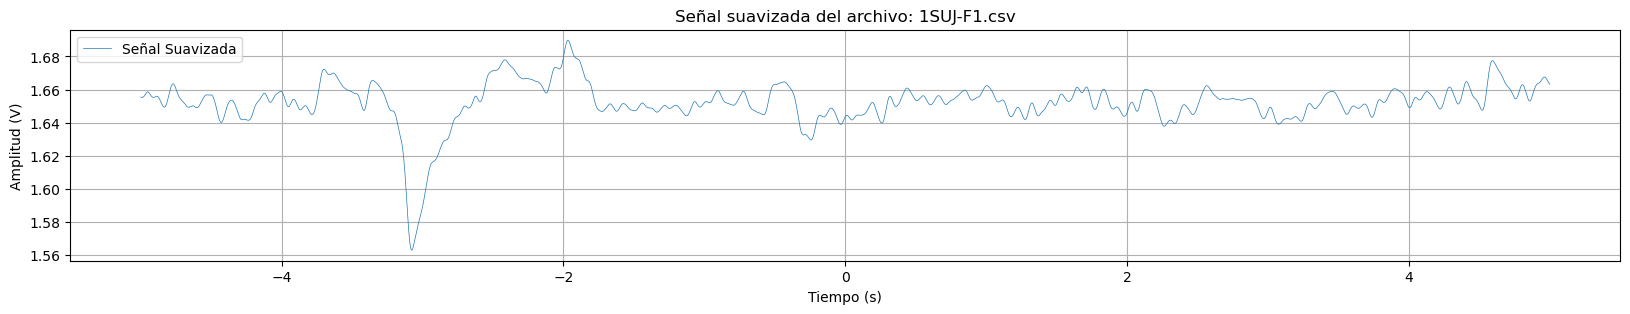

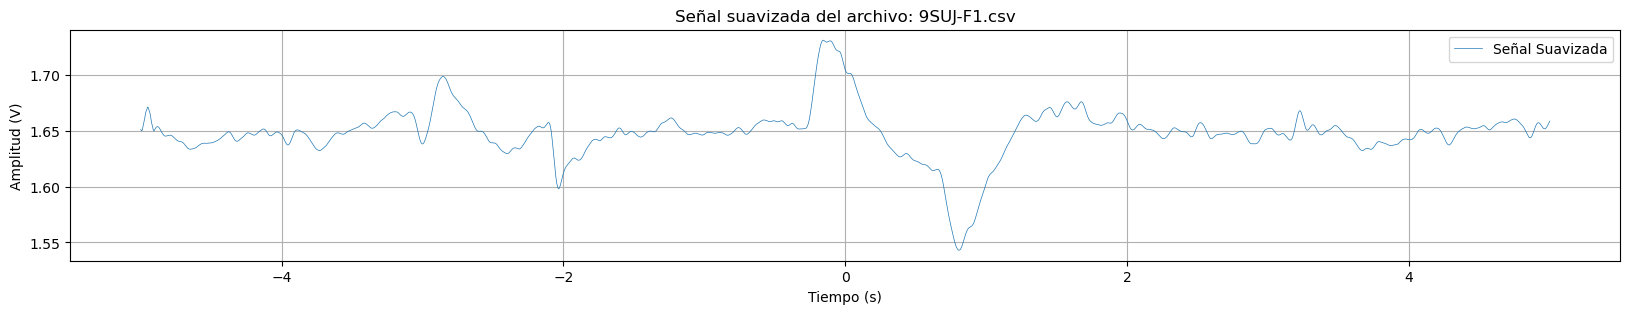

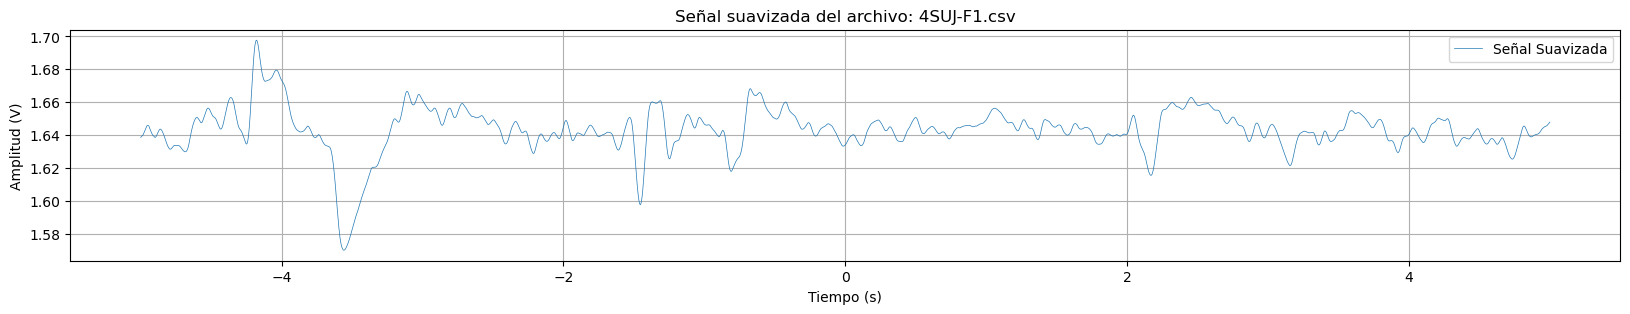

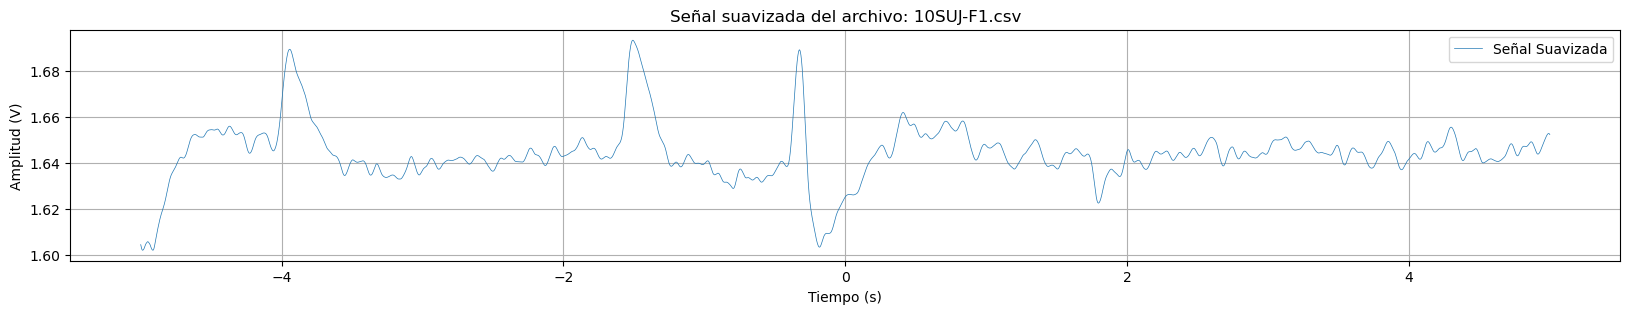

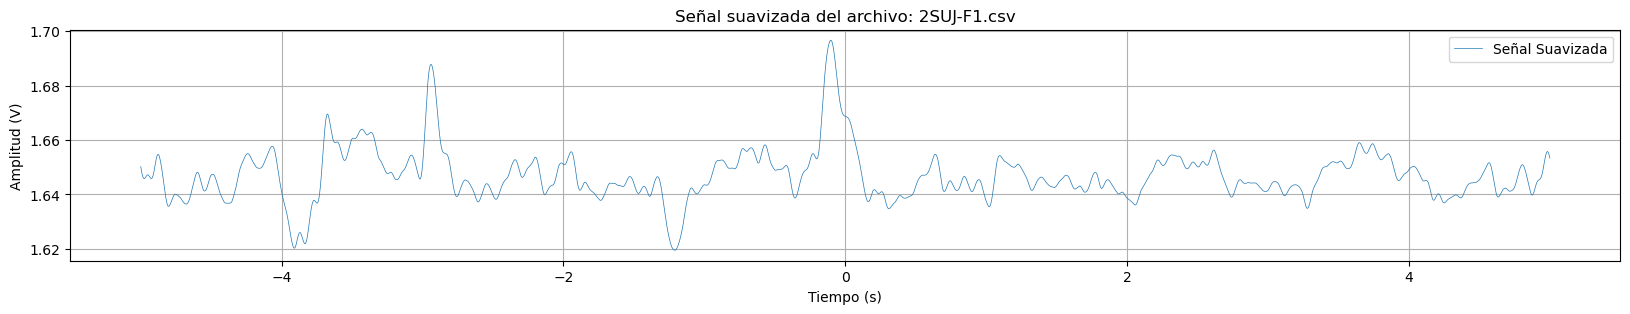

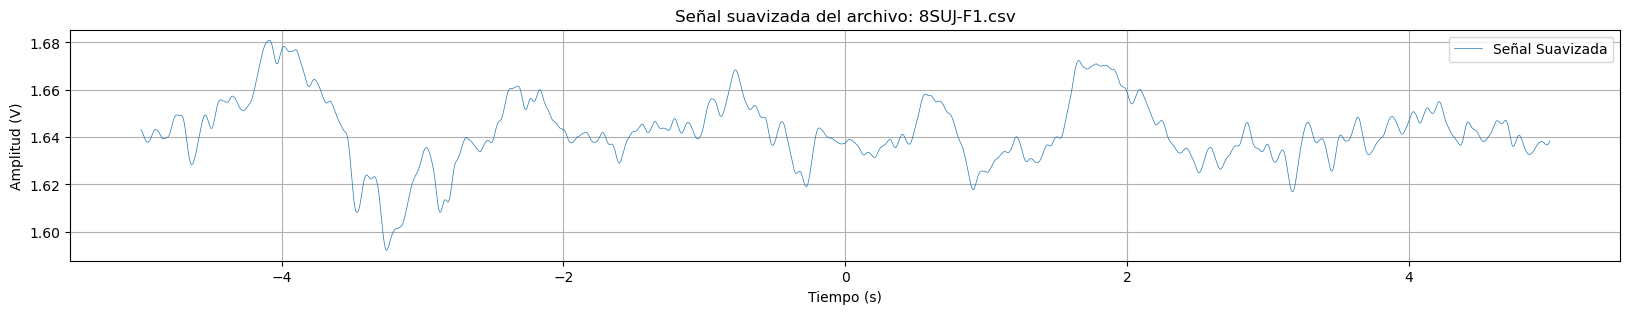

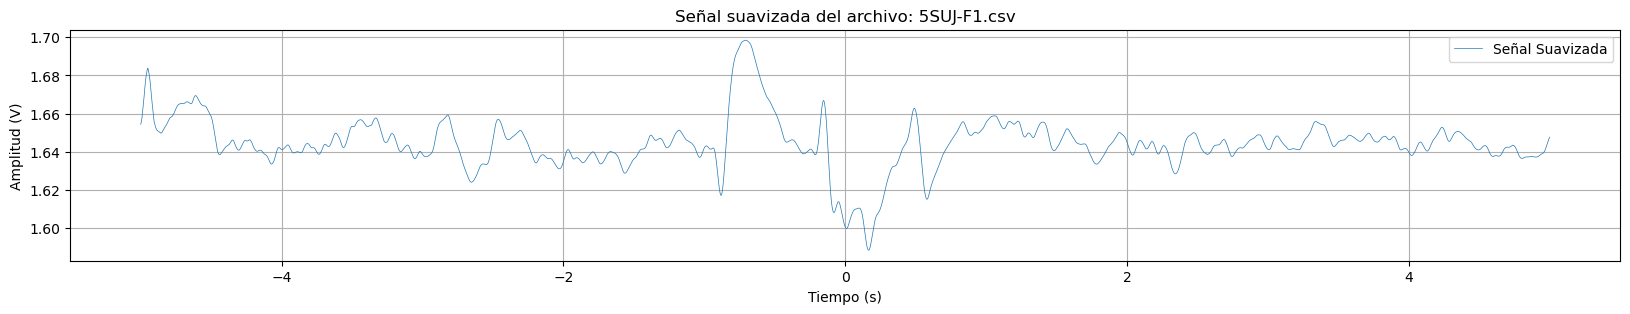

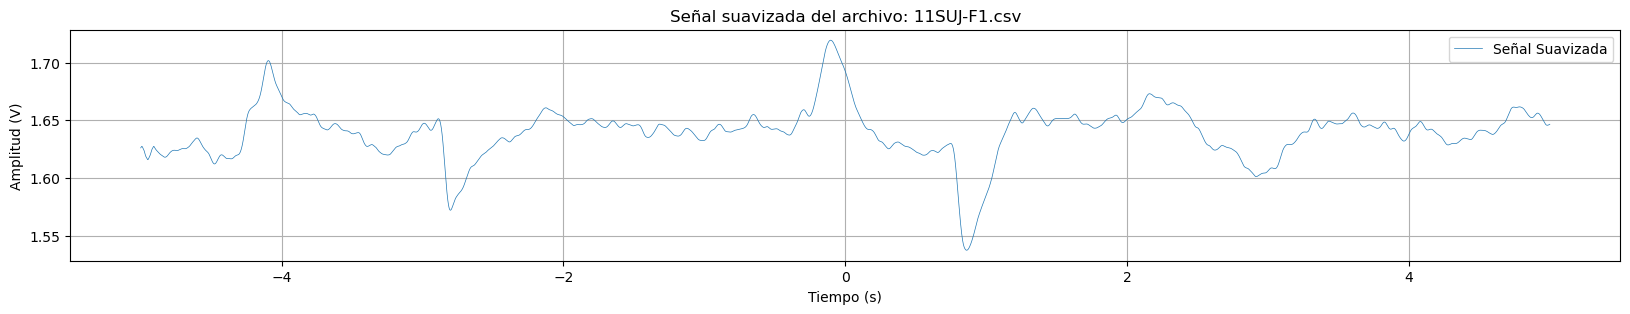

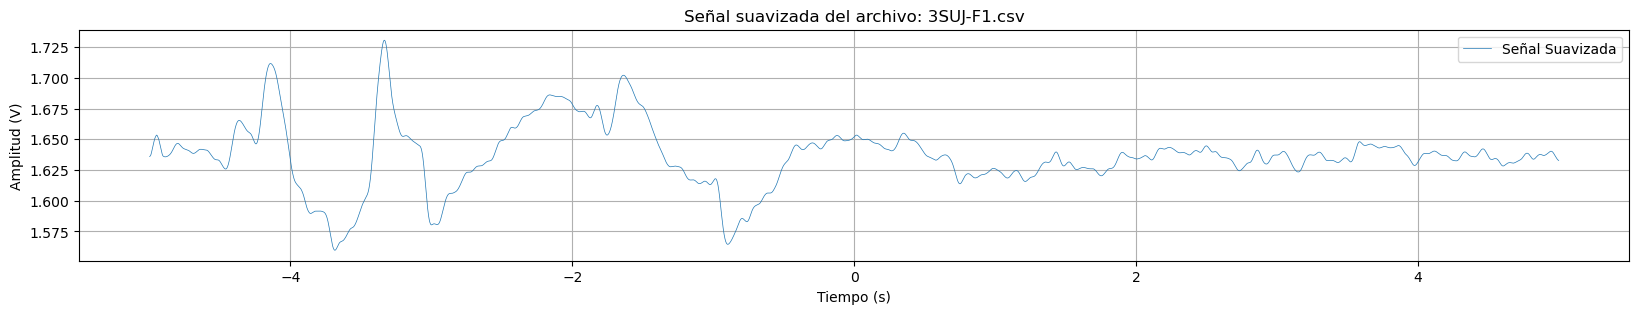

In [51]:

directorio_csv = 'CSV_F1'
ventana_suavizada = 1000  # Tamaño de la ventana para el suavizado

# Lista todos los archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio_csv) if archivo.endswith('.csv')]

for nombre_archivo in archivos_csv:
    ruta_completa = os.path.join(directorio_csv, nombre_archivo)
    df = pd.read_csv(ruta_completa, skiprows=10)

    # Seleccionar la primera columna para el tiempo y la segunda para los valores de la señal
    time = df.iloc[:, 0].to_numpy()
    signal = df.iloc[:, 1].to_numpy()
    
    # Aplicar suavizado
    signal_smo = smooth(signal, ventana_suavizada)
    signal_smo = signal_smo[:-(ventana_suavizada)]  # Ajustar la longitud de la señal suavizada
    
    # Ajustar la serie de tiempo para que coincida con la longitud de la señal suavizada
    time_avg = time[:len(signal_smo)]

    # Crear el gráfico de la señal suavizada
    plt.figure(figsize=(20, 3))
    plt.plot(time_avg, signal_smo, label='Señal Suavizada', linewidth=0.5)

    # Personalización del gráfico
    plt.title(f'Señal suavizada del archivo: {nombre_archivo}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (V)')
    plt.legend()
    plt.grid(True)
    
    plt.show()
    plt.close()


Prom. movil y smooth en csv

In [53]:
directorio_csv = 'CSV_F1'
directorio_destino = 'CSV_SMOOTH_F1'  # Carpeta donde se guardarán las señales suavizadas
ventana_suavizada = 1200  # Tamaño de la ventana para el suavizado

# Crear el directorio de destino si no existe
if not os.path.exists(directorio_destino):
    os.makedirs(directorio_destino)

archivos_csv = [archivo for archivo in os.listdir(directorio_csv) if archivo.endswith('.csv')]

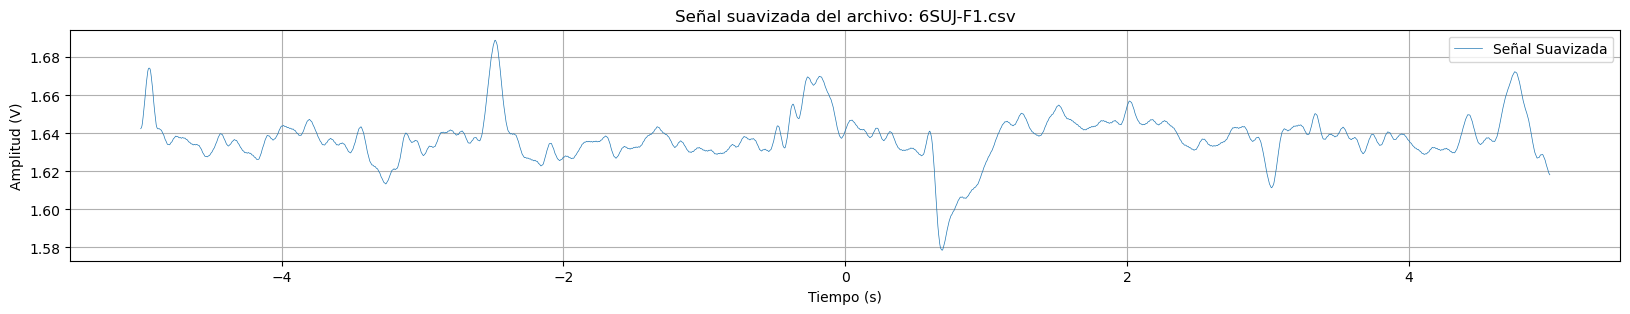

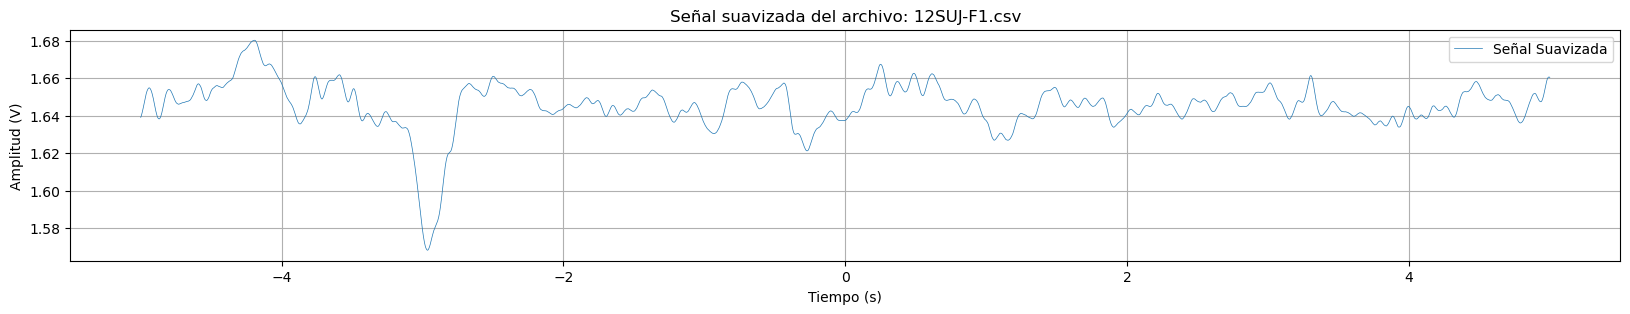

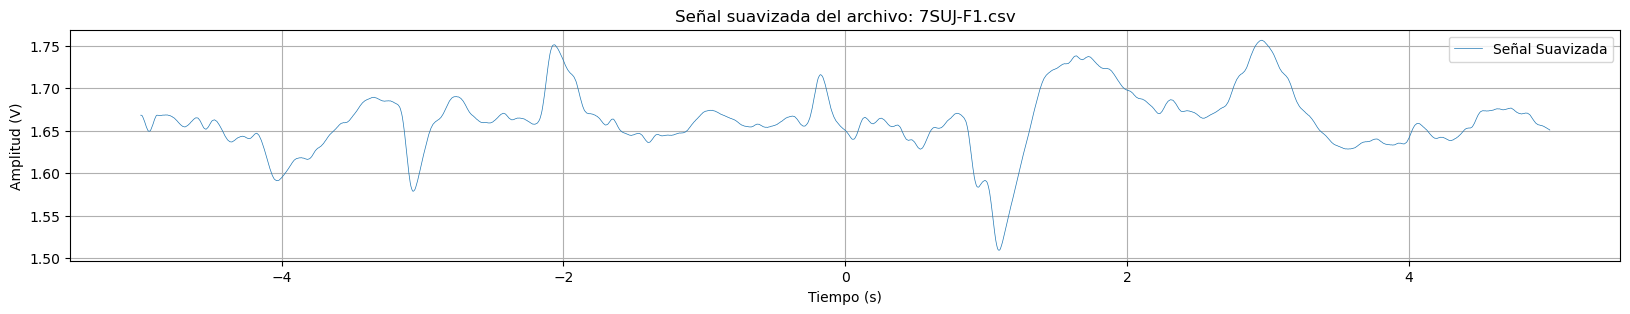

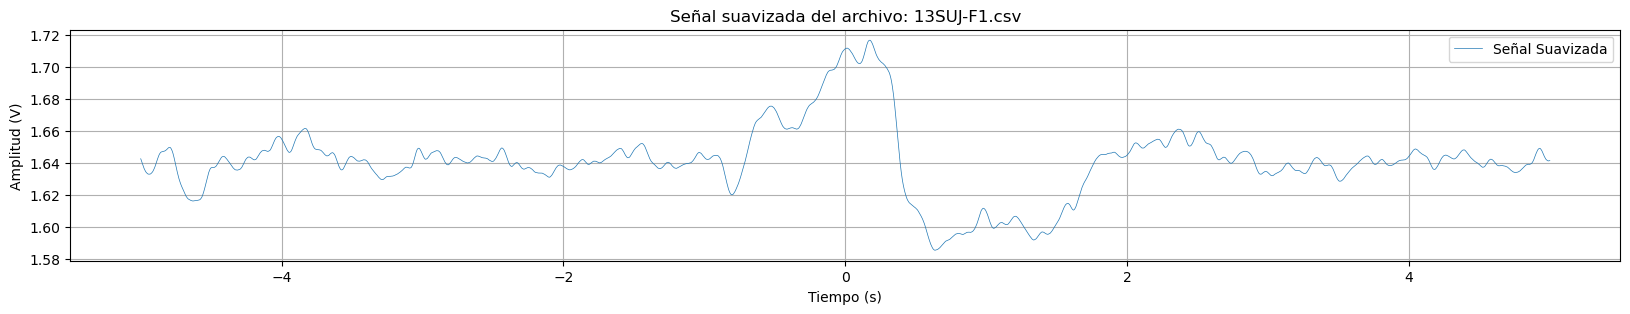

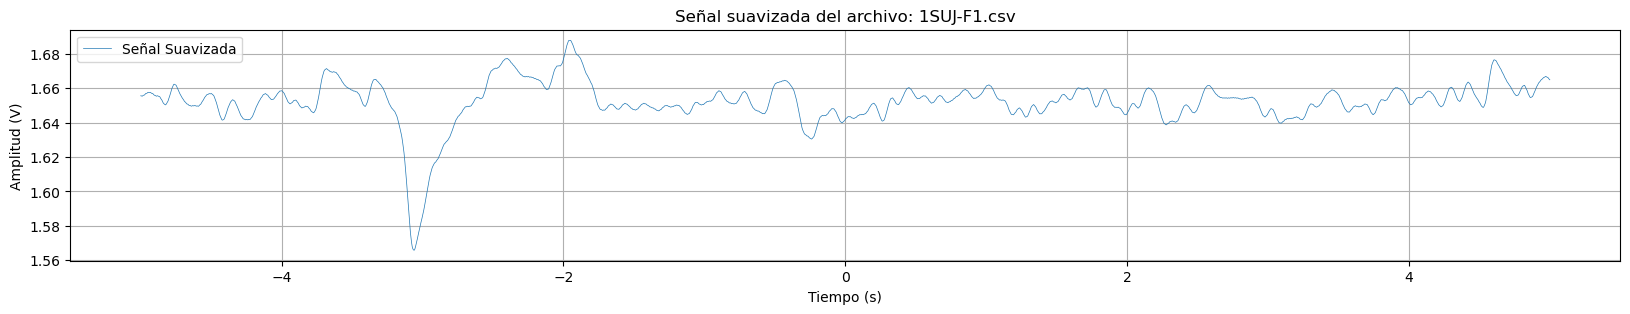

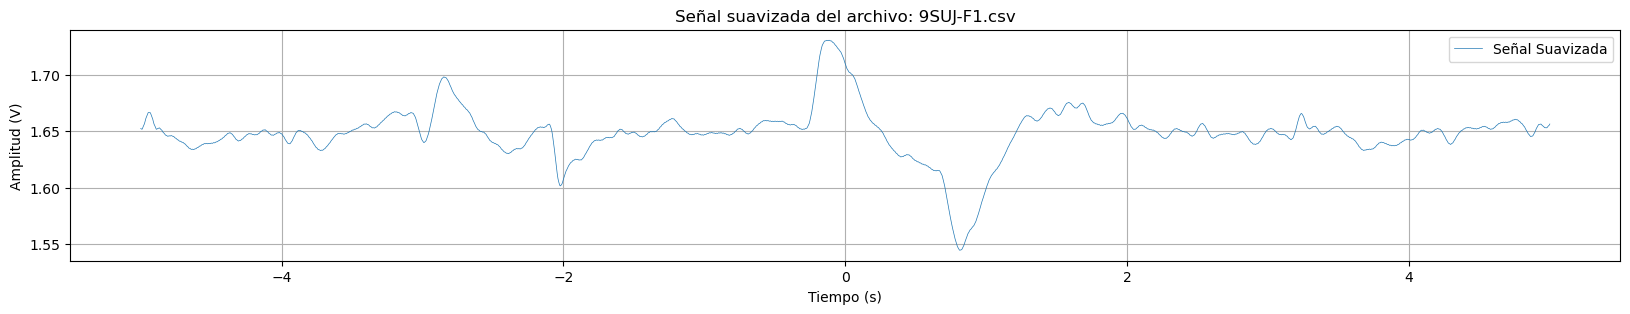

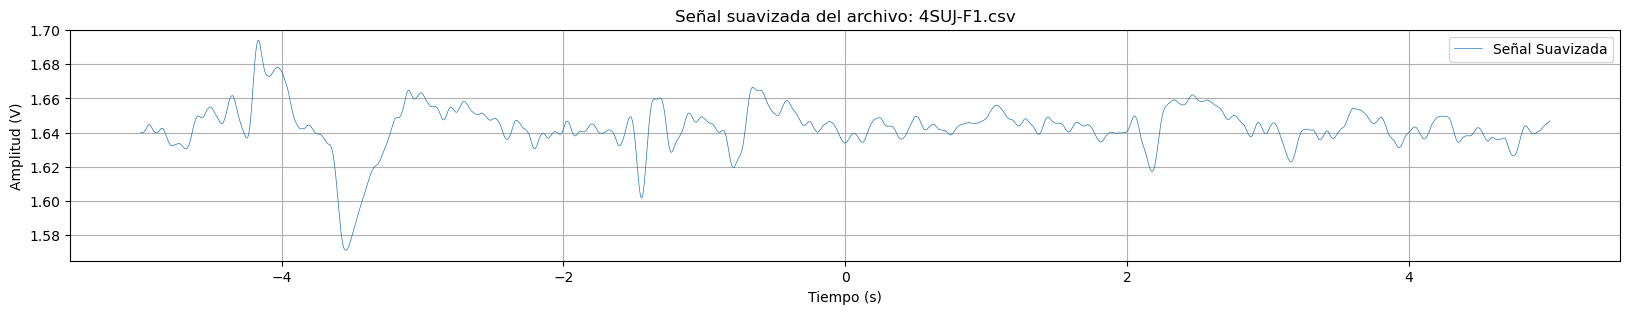

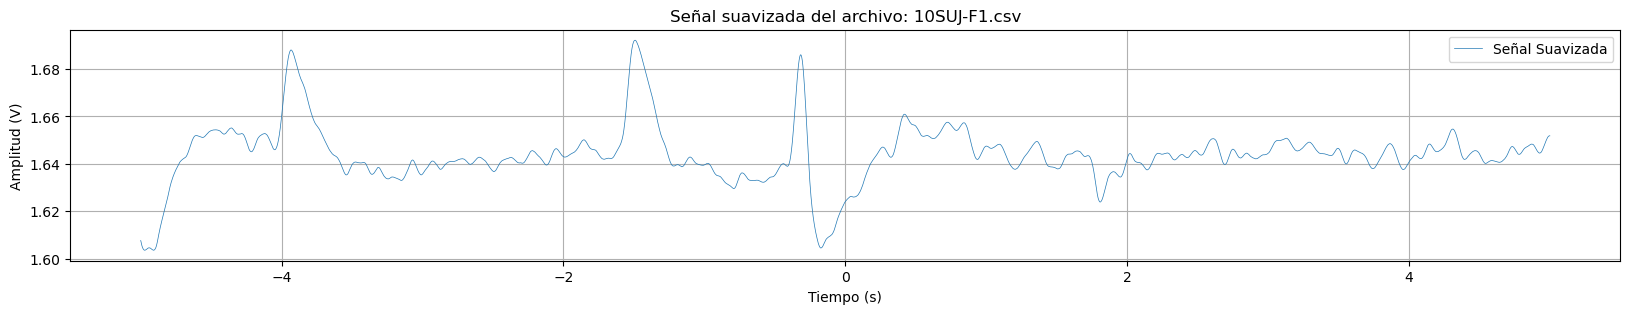

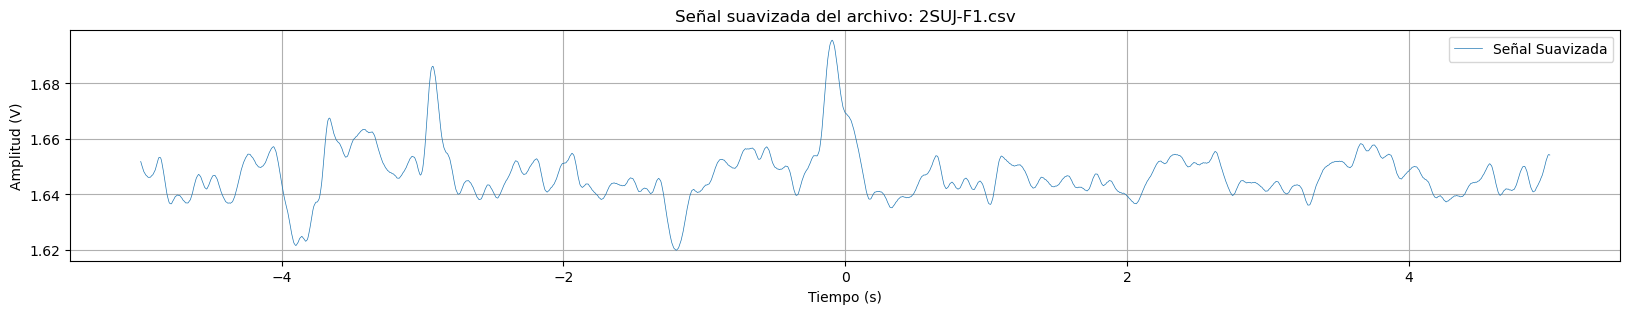

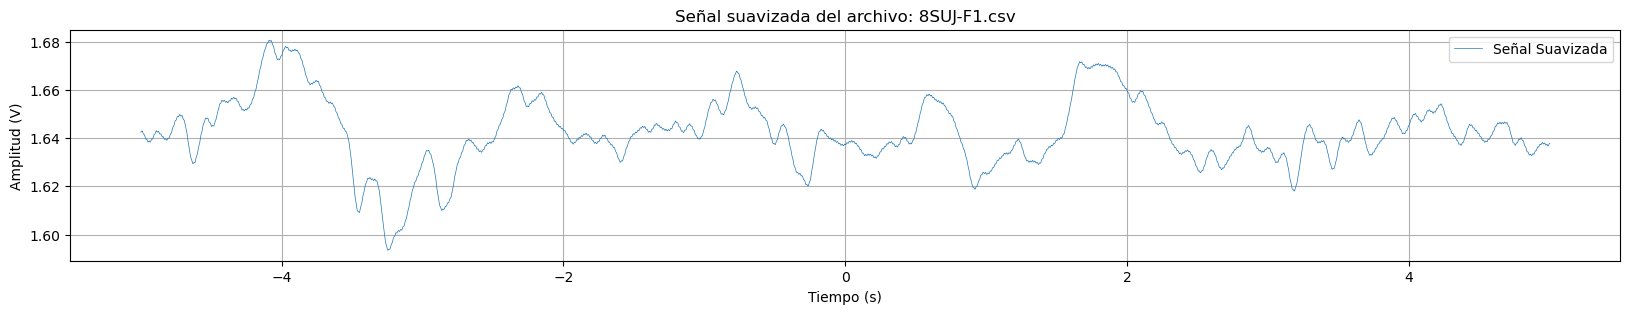

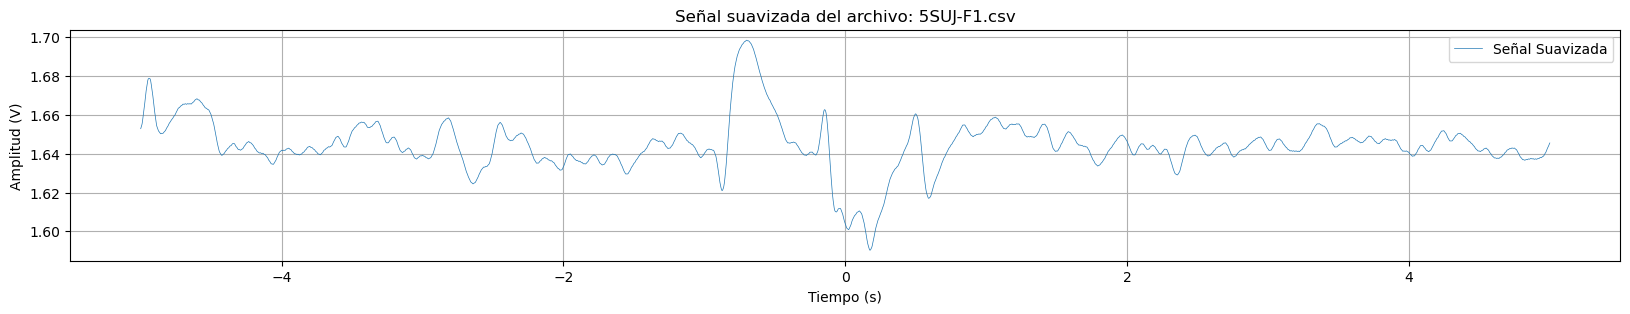

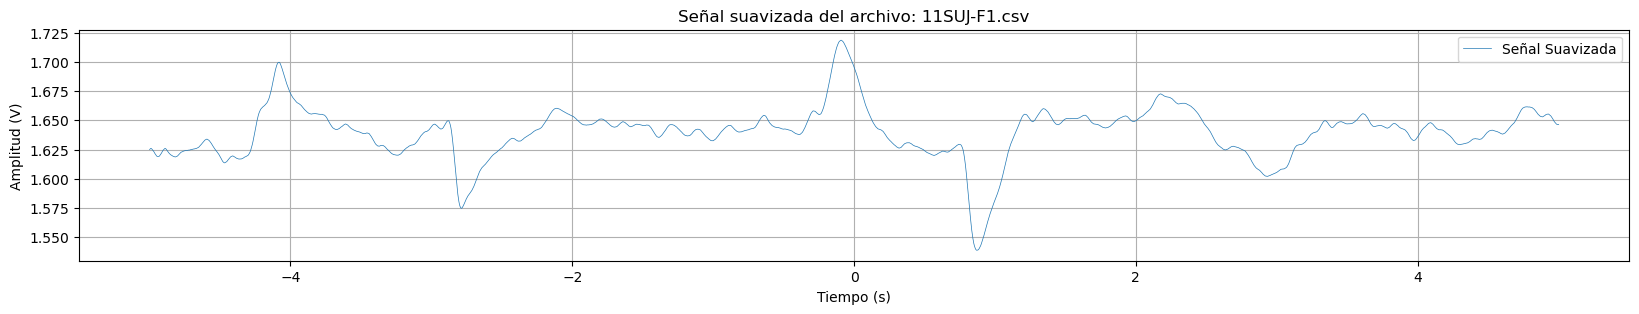

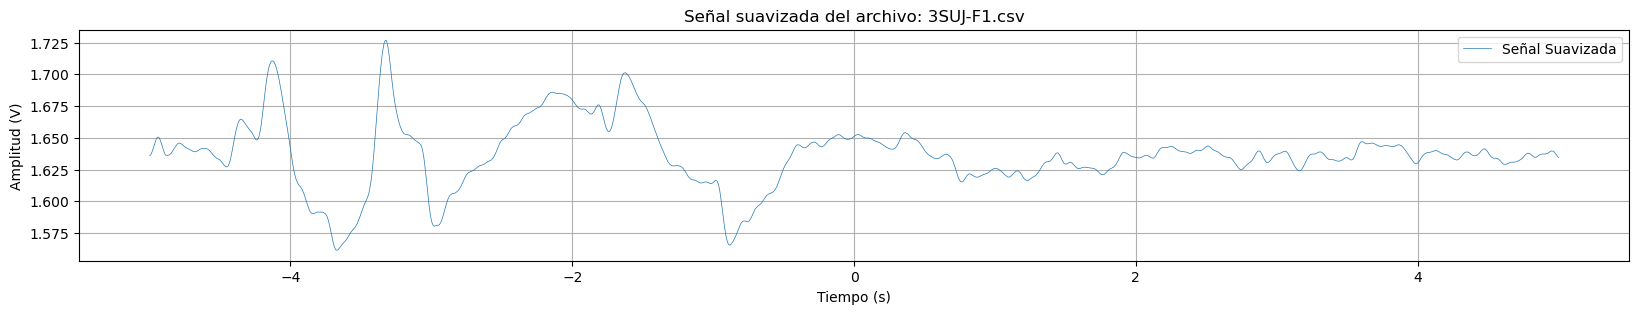

In [54]:
for nombre_archivo in archivos_csv:
    ruta_completa = os.path.join(directorio_csv, nombre_archivo)
    df = pd.read_csv(ruta_completa, skiprows=10)

    # Seleccionar la primera columna para el tiempo y la segunda para los valores de la señal
    time = df.iloc[:, 0].to_numpy()
    signal = df.iloc[:, 1].to_numpy()
    
    # Aplicar suavizado
    signal_smo = smooth(signal, ventana_suavizada)
    signal_smo = signal_smo[:-(ventana_suavizada-1)]
    
    # Ajustar la serie de tiempo para que coincida con la longitud de la señal suavizada
    time_avg = time[:len(signal_smo)]

    # Crear DataFrame con los datos suavizados
    df_suavizado = pd.DataFrame({'Tiempo': time_avg, 'Señal Suavizada': signal_smo})

    # Guardar el DataFrame suavizado en un archivo CSV en la carpeta de destino
    ruta_destino = os.path.join(directorio_destino, f'Suavizado_{nombre_archivo}')
    df_suavizado.to_csv(ruta_destino, index=False)

    # Crear y mostrar el gráfico de la señal suavizada
    plt.figure(figsize=(20, 3))
    plt.plot(time_avg, signal_smo, label='Señal Suavizada', linewidth=0.5)
    plt.title(f'Señal suavizada del archivo: {nombre_archivo}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (V)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()


Deteccion de Picos y Valles

In [55]:
from scipy.signal import find_peaks

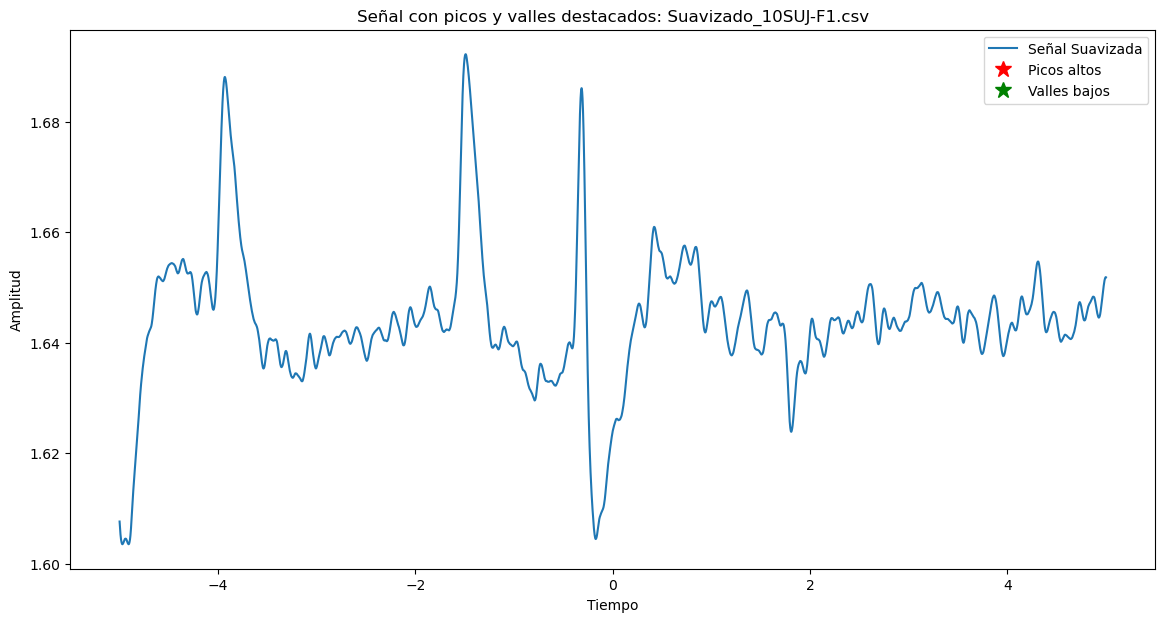

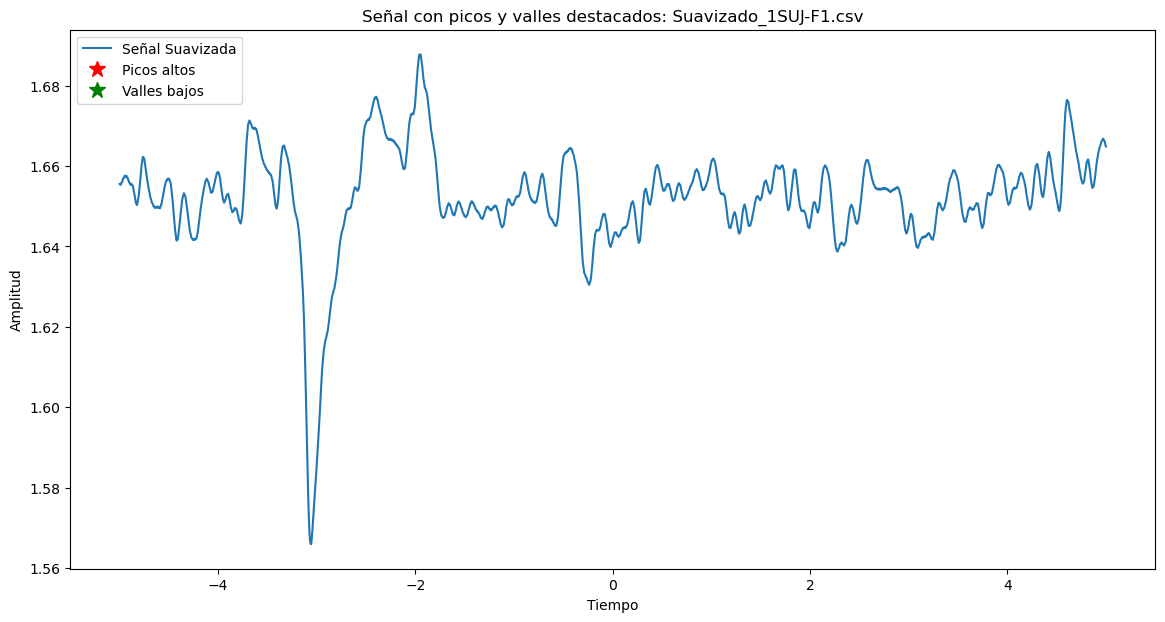

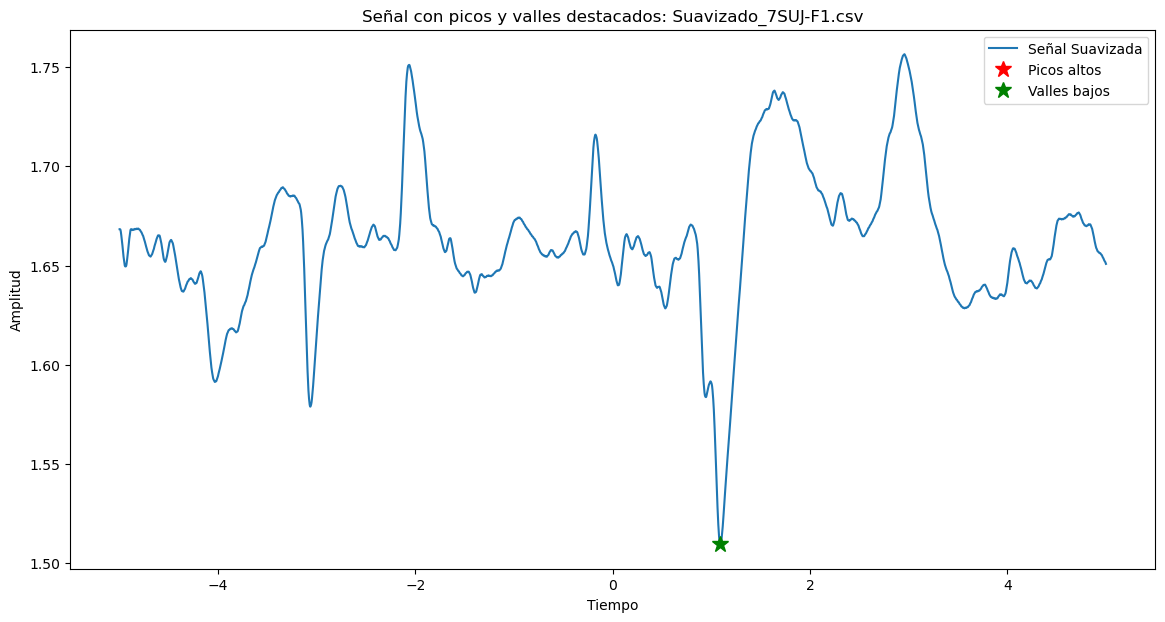

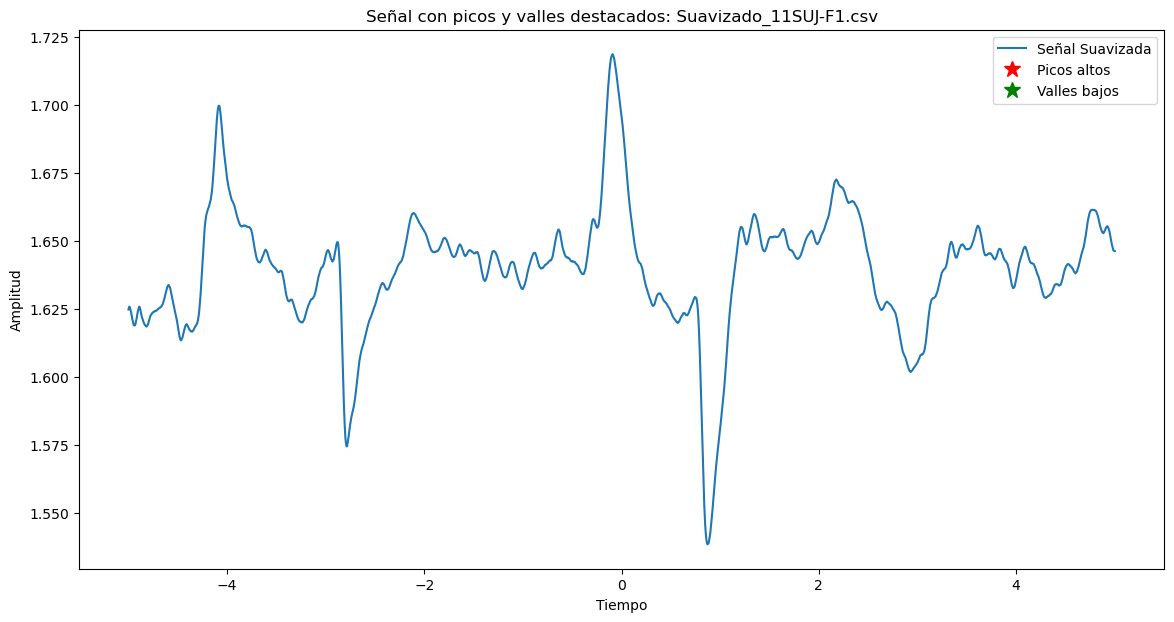

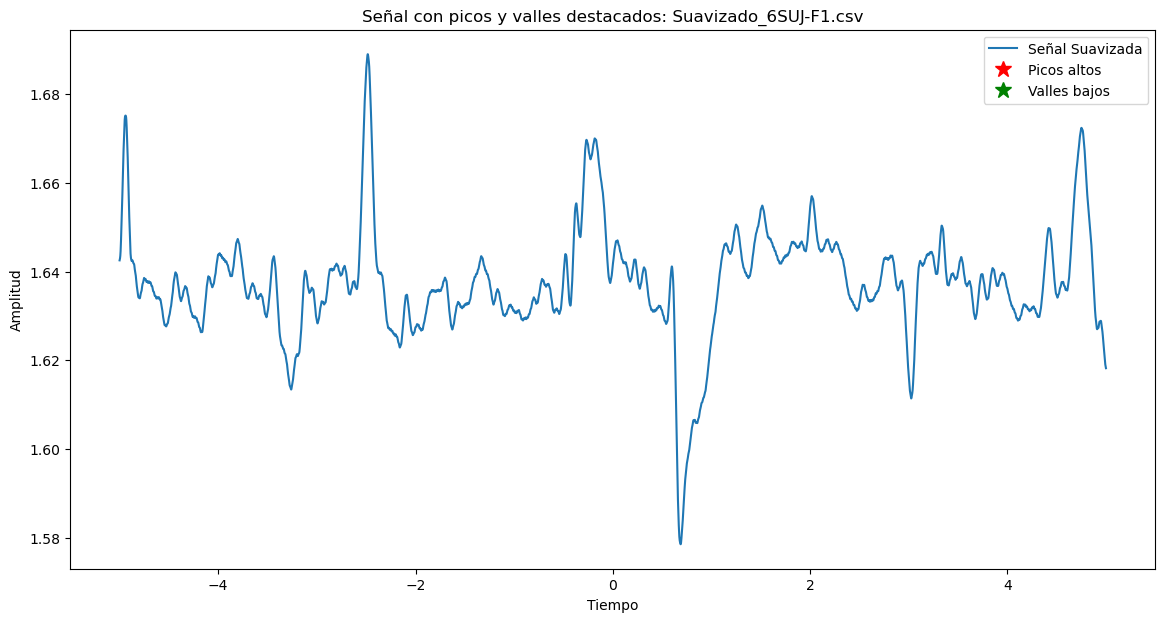

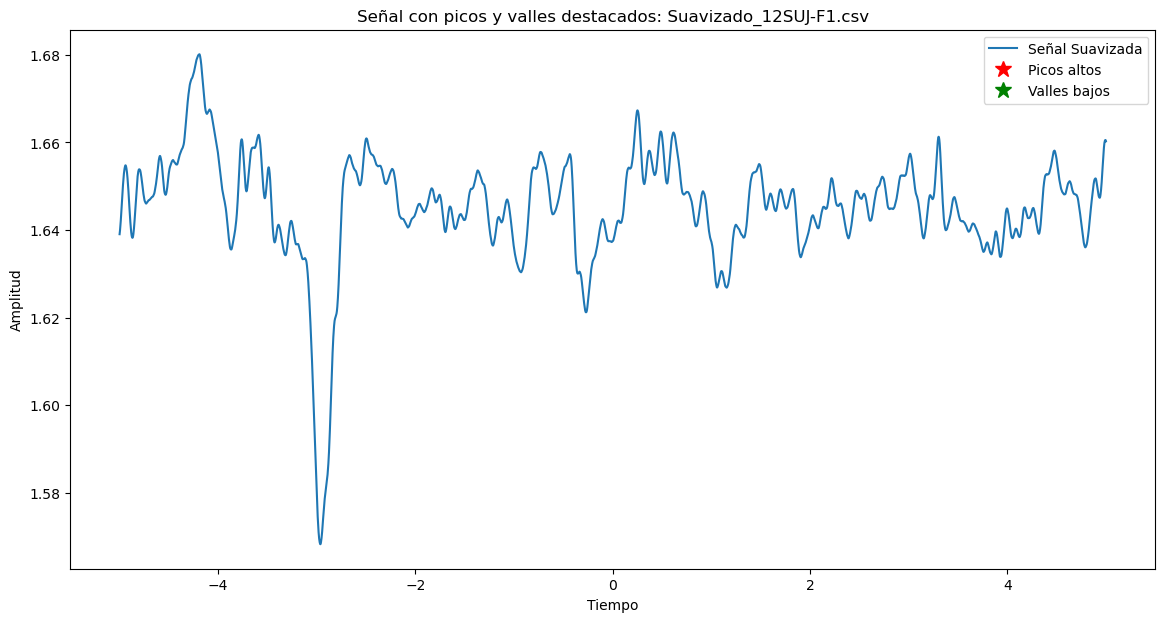

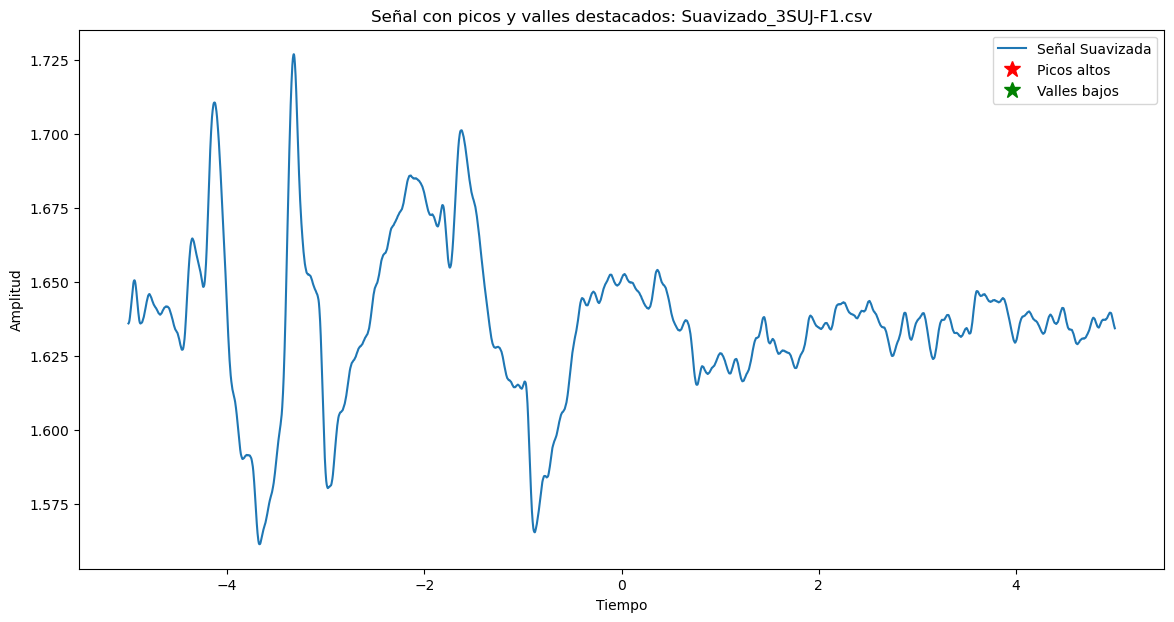

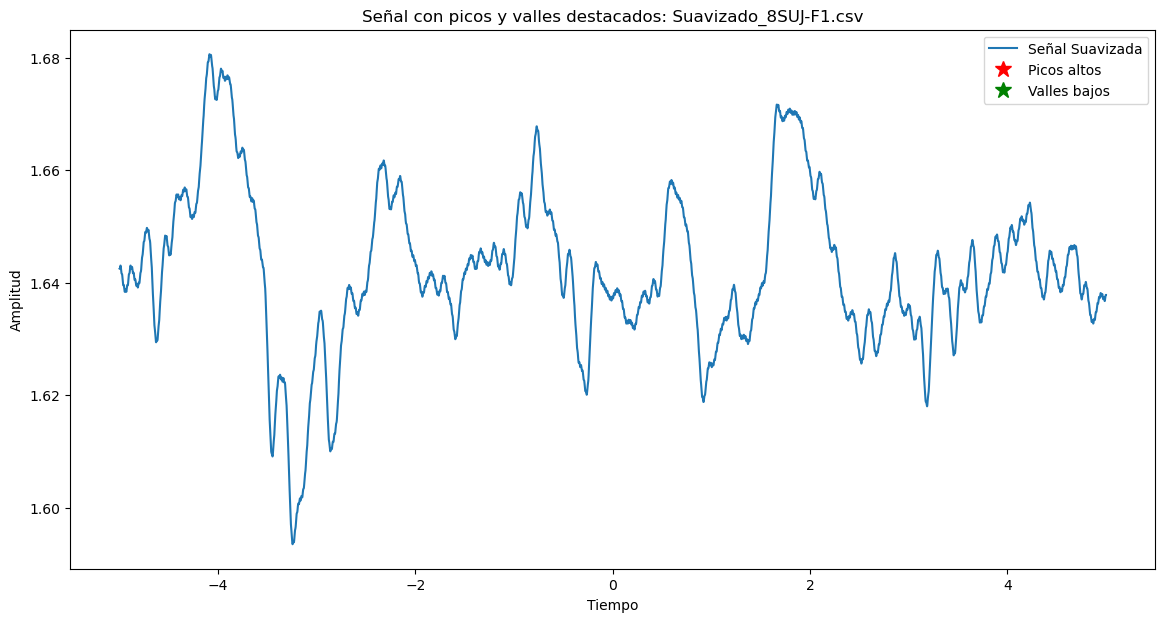

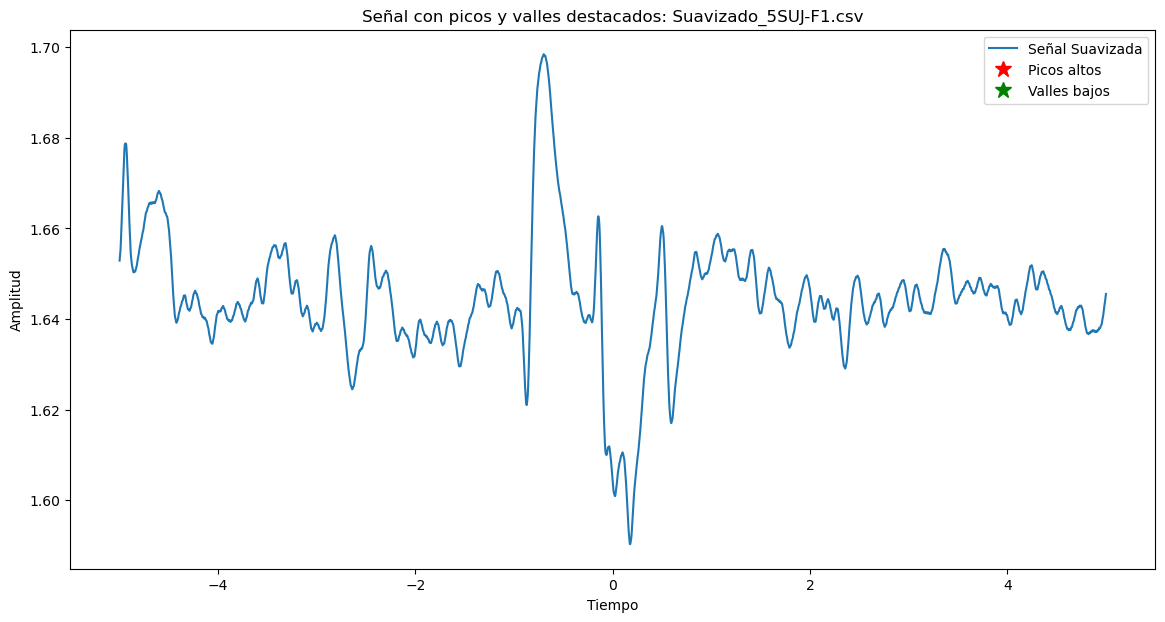

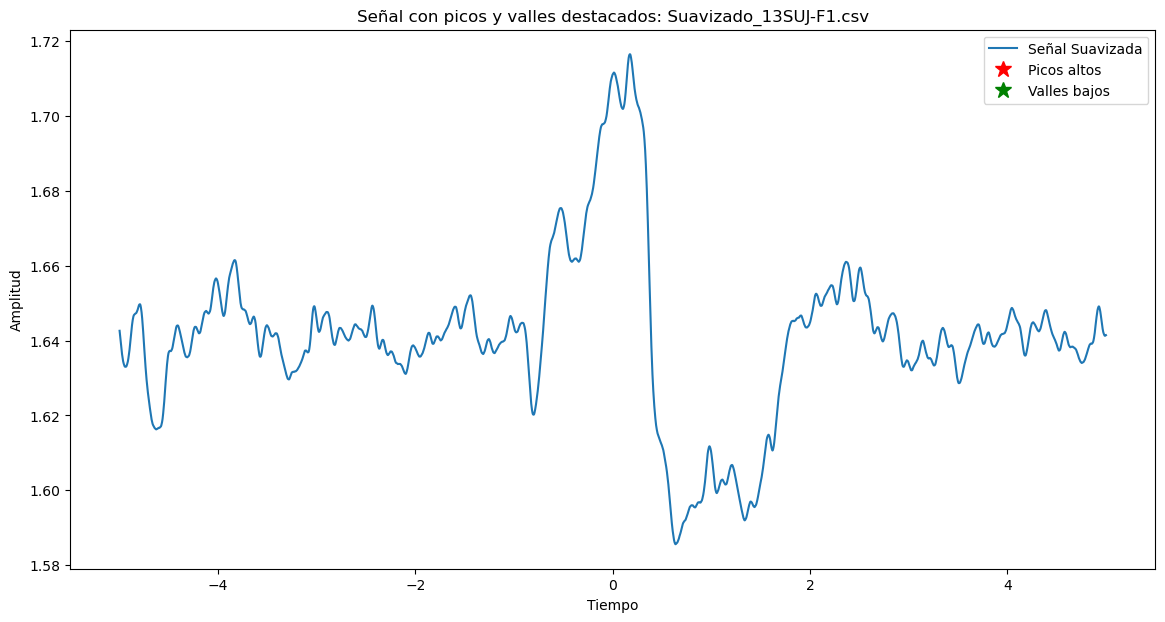

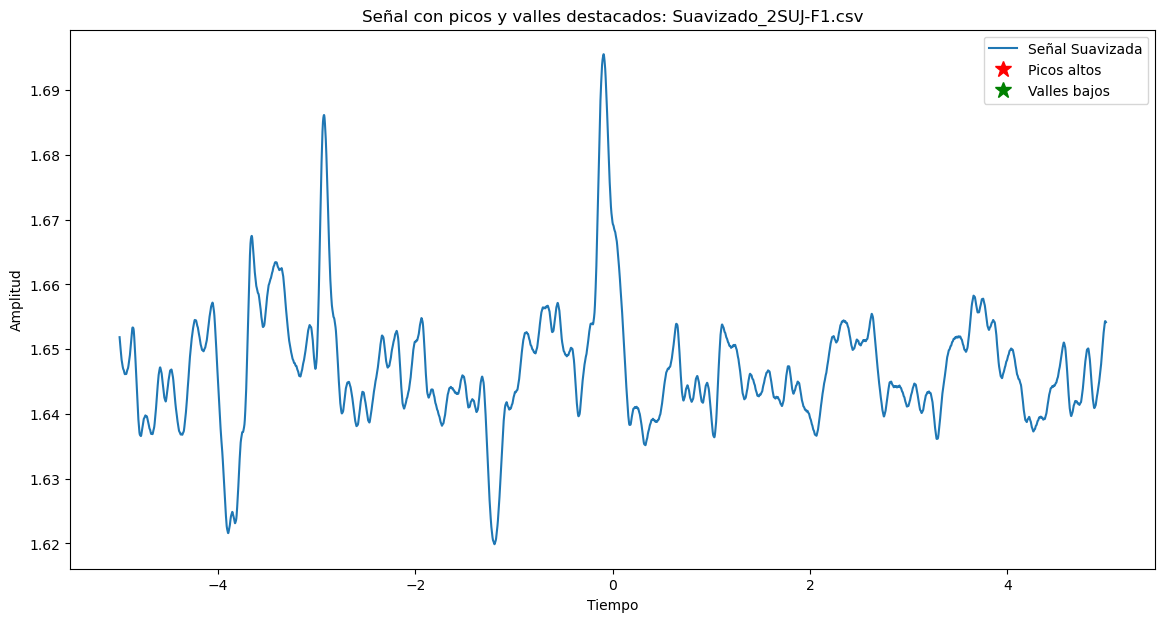

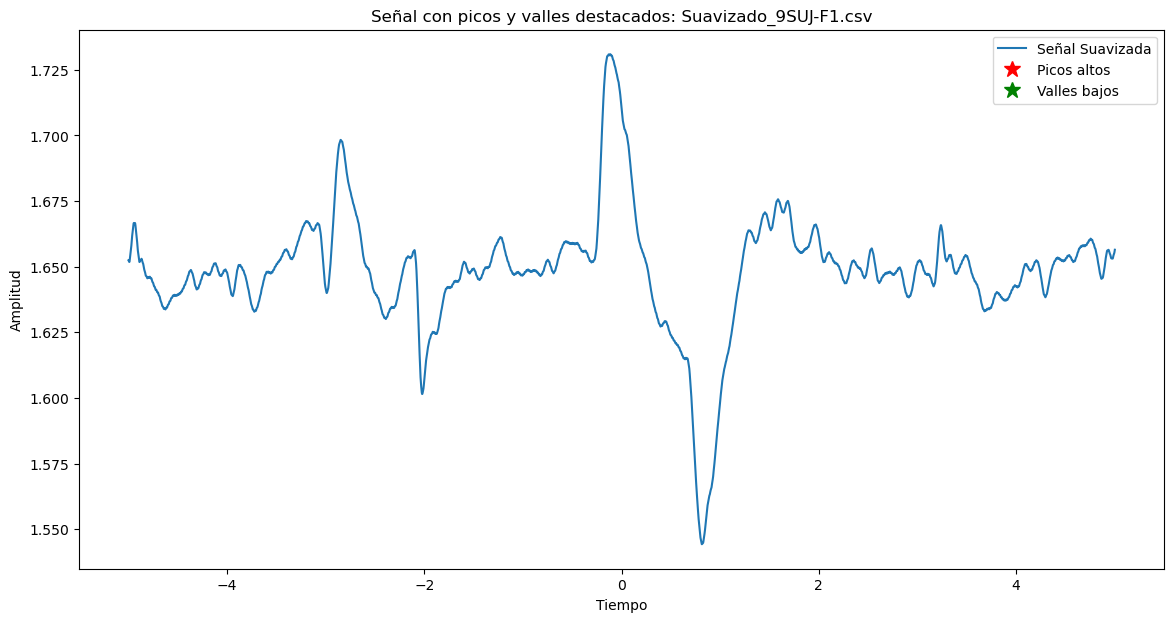

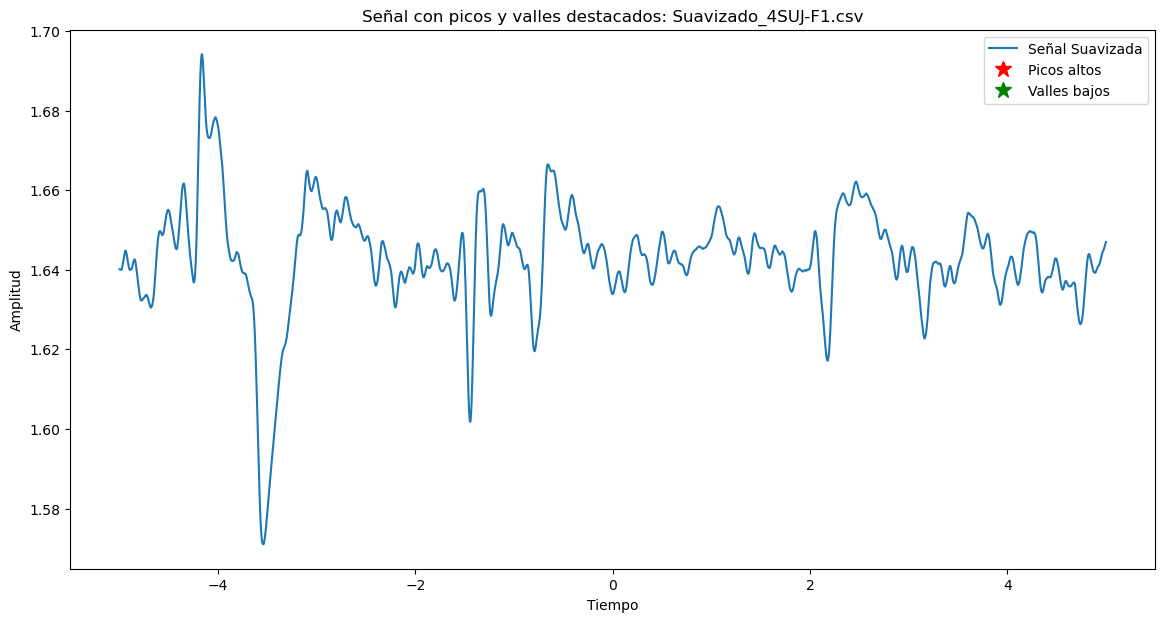

In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Asegúrate de definir la función smooth correctamente aquí si es necesaria para tu script

directorio_csv = 'CSV_SMOOTH_F1'  # Directorio con los archivos CSV
ventana_suavizada = 1200  # Tamaño de la ventana para el suavizado

for nombre_archivo in os.listdir(directorio_csv):
    if nombre_archivo.endswith('.csv'):
        ruta_completa = os.path.join(directorio_csv, nombre_archivo)
        df = pd.read_csv(ruta_completa)

        # Asegurarse de que los datos son numéricos, usando el nombre correcto de la columna
        df['Señal Suavizada'] = pd.to_numeric(df['Señal Suavizada'], errors='coerce')
        df.dropna(subset=['Señal Suavizada'], inplace=True)
        
        # Obtener la señal y el tiempo
        signal = df['Señal Suavizada'].values
        if 'Tiempo' in df.columns:
            time = df['Tiempo'].values
        else:
            time = np.arange(len(signal))  # Crear una secuencia de tiempo si no existe la columna

        # Detectar los picos más altos y los valles más bajos utilizando criterios específicos, por ejemplo, la prominencia
        prominencia = np.max(signal) * 0.1  # Ejemplo: picos con prominencia al menos del 10% del máximo
        picos_indices, _ = find_peaks(signal, prominence=prominencia)
        valles_indices, _ = find_peaks(-signal, prominence=prominencia)

        # Visualización de los resultados
        plt.figure(figsize=(14, 7))
        plt.plot(time, signal, label='Señal Suavizada')
        plt.plot(time[picos_indices], signal[picos_indices], 'r*', markersize=12, label='Picos altos')
        plt.plot(time[valles_indices], signal[valles_indices], 'g*', markersize=12, label='Valles bajos')
        plt.legend()
        plt.title(f'Señal con picos y valles destacados: {nombre_archivo}')
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.show()
